# Plots

This notebook contains the code for every plot used on the paper.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# family usage by vertical
df = pd.read_csv('../data/family_top_usage.csv')
pivot = df.pivot(index="team", columns="family", values="usage_count")

team_families = {}

for index, row in df.iterrows():
    team = row['team']

    if team == 'no_team':
        continue

    if team not in team_families:
        team_families[team] = [[],[]]

    team_families[team][0].append(row['family'])
    team_families[team][1].append(row['usage_count'])

print(team_families)

{'Assisted Sales': [['c5', 't3', 't2'], [108577, 80288, 73289]], 'Channel & Supplier Managment': [['t3', 'c5', 't2'], [984646, 806393, 783274]], 'Corp Systems': [['t2', 't3', 't4g'], [670211, 457926, 153370]], 'Data & Analytics': [['m5', 'r5', 'c5'], [842825, 490134, 318777]], 'Developer Experience': [['t3', 'c4', 't2'], [774386, 649717, 301705]], 'Distributed OMS (DOM)': [['c5', 'c4', 't3'], [7527682, 5605809, 1688254]], 'Extensions': [['c5', 'c6i', 'c6a'], [8239497, 2536143, 2516652]], 'Merchandising Exp.': [['c5', 'c4', 'c7g'], [10805902, 4747468, 2673344]], 'Merchant Platform': [['c5d', 'm5d', 'c5'], [3228853, 597567, 557954]], 'Purchase': [['c4', 'c5', 'c6i'], [4401778, 3115799, 1527858]], 'SRE': [['c5', 'r5', 'm5'], [6802027, 2116626, 1818173]], 'Security': [['t2', 'c5', 'm5a'], [617718, 257954, 128435]], 'Storefronts': [['c5', 'c5a', 'c6a'], [170538, 121881, 43814]]}


In [23]:
sorting_list = []

for vertical, (_, values) in team_families.items():
    sorting_list.append((sum(values), vertical))

top_8 = sorted(sorting_list, reverse=True)[8:]
print(top_8)
print(team_families)

for _, vertical in top_8:
    team_families.pop(vertical)

print(team_families)

[(1651736, 'Data & Analytics'), (1281507, 'Corp Systems'), (1004107, 'Security'), (336233, 'Storefronts'), (262154, 'Assisted Sales')]
{'Assisted Sales': [['c5', 't3', 't2'], [108577, 80288, 73289]], 'Channel & Supplier Managment': [['t3', 'c5', 't2'], [984646, 806393, 783274]], 'Corp Systems': [['t2', 't3', 't4g'], [670211, 457926, 153370]], 'Data & Analytics': [['m5', 'r5', 'c5'], [842825, 490134, 318777]], 'Developer Experience': [['t3', 'c4', 't2'], [774386, 649717, 301705]], 'Distributed OMS (DOM)': [['c5', 'c4', 't3'], [7527682, 5605809, 1688254]], 'Extensions': [['c5', 'c6i', 'c6a'], [8239497, 2536143, 2516652]], 'Merchandising Exp.': [['c5', 'c4', 'c7g'], [10805902, 4747468, 2673344]], 'Merchant Platform': [['c5d', 'm5d', 'c5'], [3228853, 597567, 557954]], 'Purchase': [['c4', 'c5', 'c6i'], [4401778, 3115799, 1527858]], 'SRE': [['c5', 'r5', 'm5'], [6802027, 2116626, 1818173]], 'Security': [['t2', 'c5', 'm5a'], [617718, 257954, 128435]], 'Storefronts': [['c5', 'c5a', 'c6a'], [170

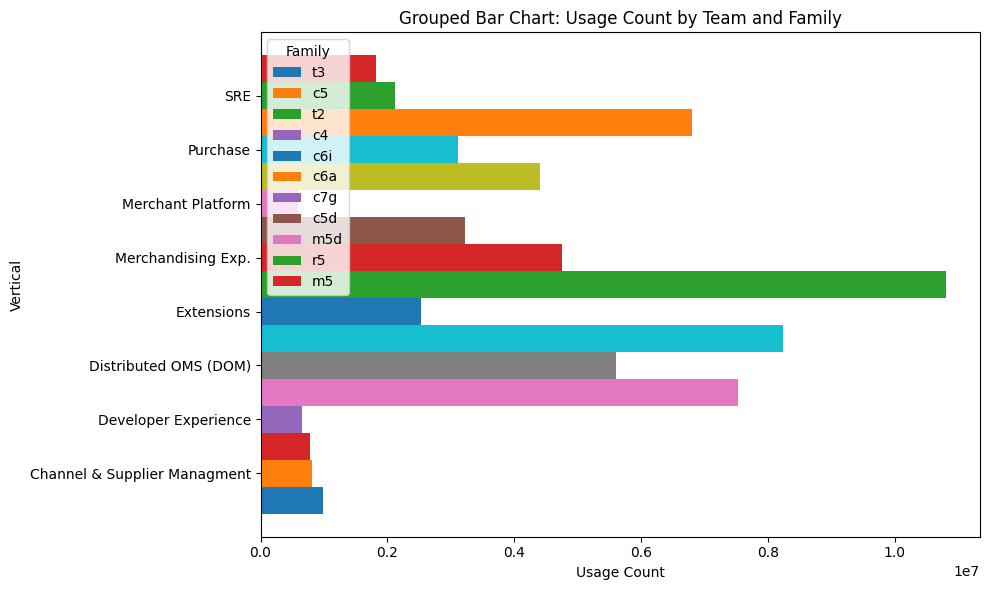

In [ ]:
x = list(range(len(team_families)))
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

used_labels = set()

for i, (team, values) in enumerate(team_families.items()):
    families, counts = values

    positions = [i + (j - len(families) / 2) * width + width / 2 for j in range(len(families))]

    for pos, family, count in zip(positions, families, counts):
        bar = ax.barh(pos, count, width, label=family if family not in used_labels else "")
        used_labels.add(family)

ax.set_yticks(x)
ax.set_yticklabels(team_families.keys())

ax.set_xlabel("Usage Count")
ax.set_ylabel("Vertical")
ax.set_title("Grouped Bar Chart: Usage Count by Team and Family")

ax.legend(title="Family", loc="upper left")

plt.tight_layout()
plt.show()
